# <center>Prediksi Harga Mobil

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [ ]:
df = pd.read_csv('train-data (2).csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Data Cleaning

In [ ]:
round((df.isna().sum()/len(df))*100,2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [ ]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [ ]:
(df['Power'] == 'null bhp').sum()

107

In [ ]:
df['Power'] = df['Power'].replace('null bhp',None)
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [ ]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3718,Volkswagen Polo Diesel Comfortline 1.2L,Delhi,2013,77445,Diesel,Manual,First,22.07,1199.0,73.9,5.0,3.75


In [ ]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [ ]:
df.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


In [ ]:
for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Feature Engineering

In [ ]:
df['Name'].nunique()

1633

In [ ]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [ ]:
df['Company'].nunique() , df['Model'].nunique()

(26, 182)

# Univariate Analysis

In [ ]:
# this function make the data fall in certain range.
def remove_outliers(df,col,lower,upper):
    df = df[ (df[col]>lower) & (df[col]<upper) ]
    return df

In [ ]:
# this function plots histogram and boxplot for col parameter
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

<h3>1. Year

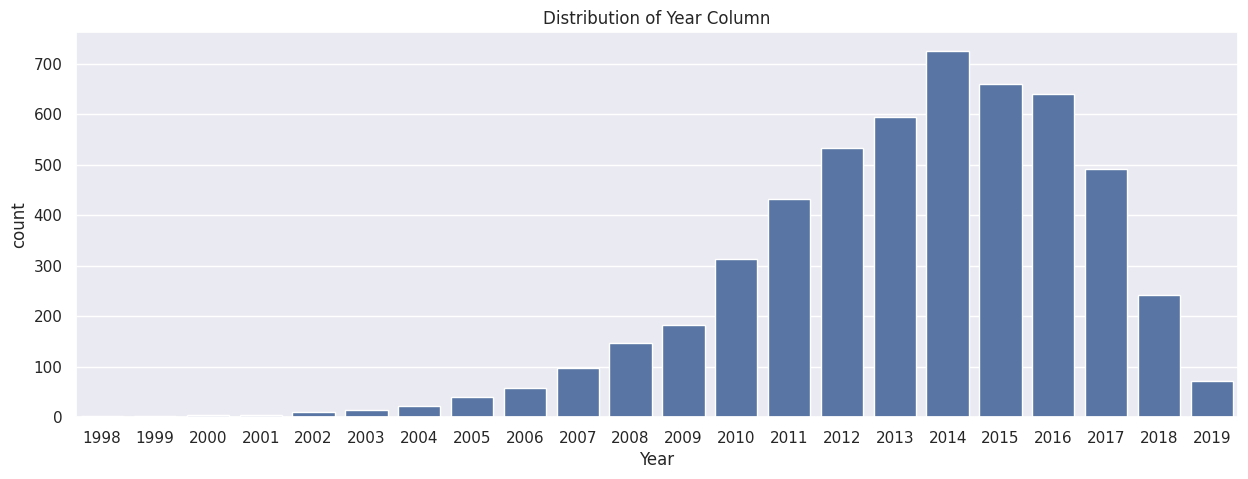

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

<h3>2. Kilometers Driven

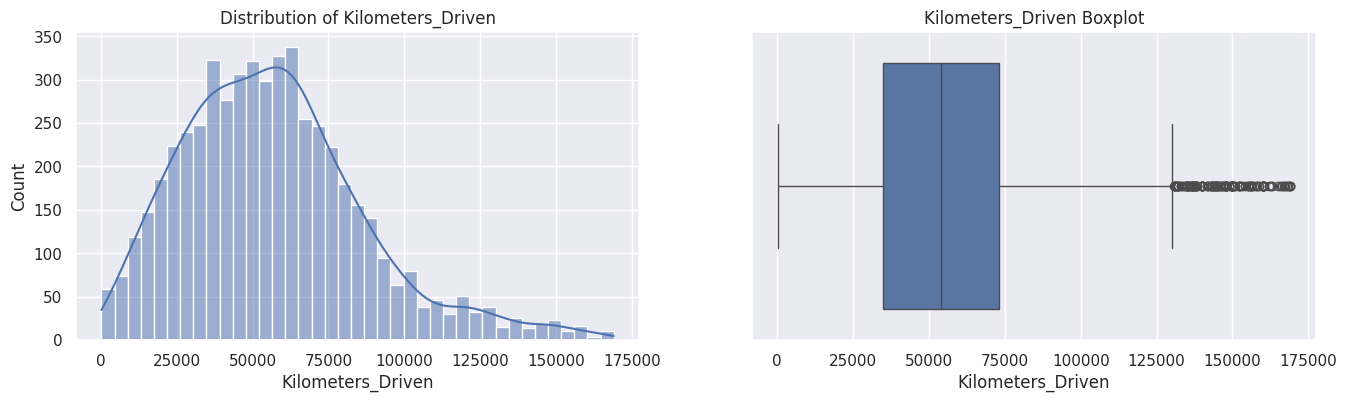

In [ ]:
plot_num(df,'Kilometers_Driven')

<h3>3. Fuel Type

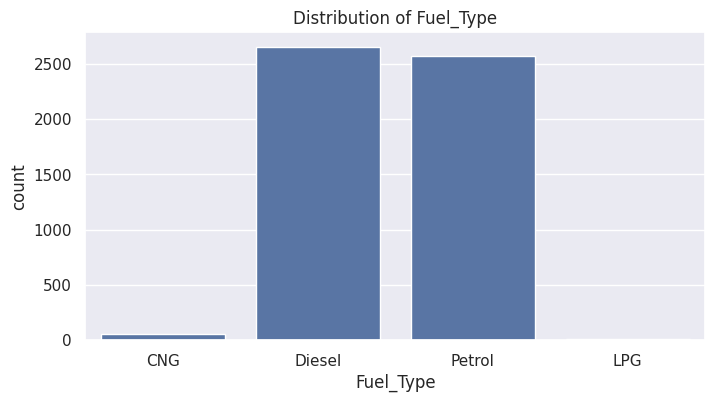

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

In [ ]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    2656
Petrol    2573
CNG         55
LPG         10
Name: count, dtype: int64

In [ ]:
df = df[~df['Fuel_Type'].isin(['LPG','Electric'])]

<h3>4. Transmission

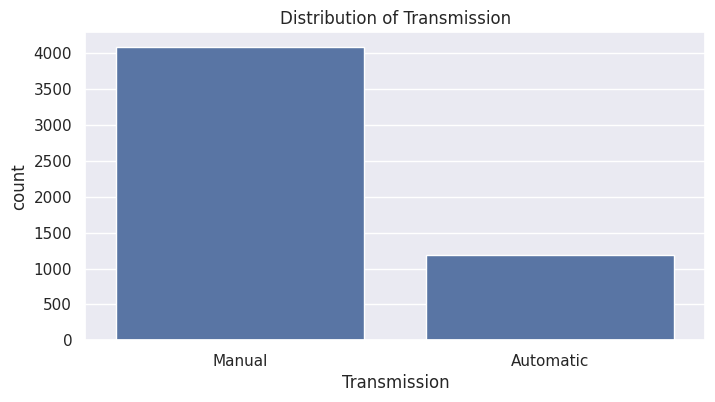

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Transmission');
plt.title('Distribution of Transmission');

In [ ]:
df['Transmission'].value_counts()

Transmission
Manual       4090
Automatic    1194
Name: count, dtype: int64

<h3>5. Owner Type

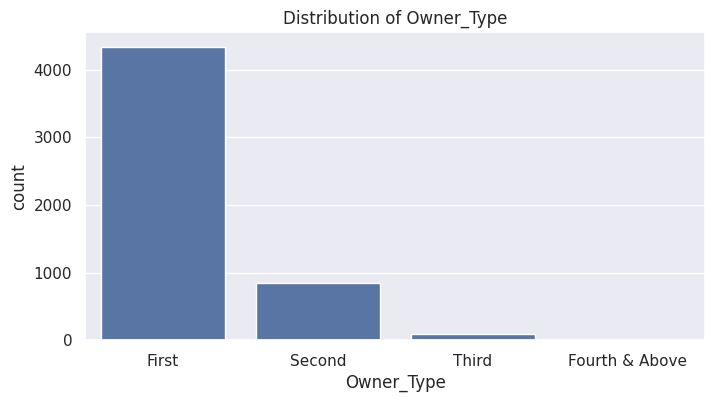

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Owner_Type');
plt.title('Distribution of Owner_Type');

In [ ]:
df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

<h3>6. Mileage

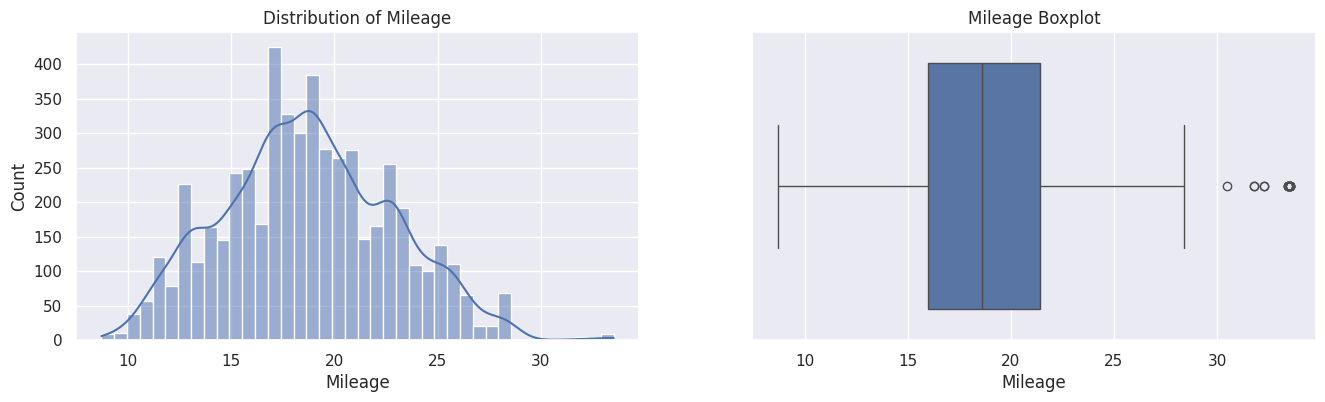

In [ ]:
plot_num(df,'Mileage')

<h3>7. Engine

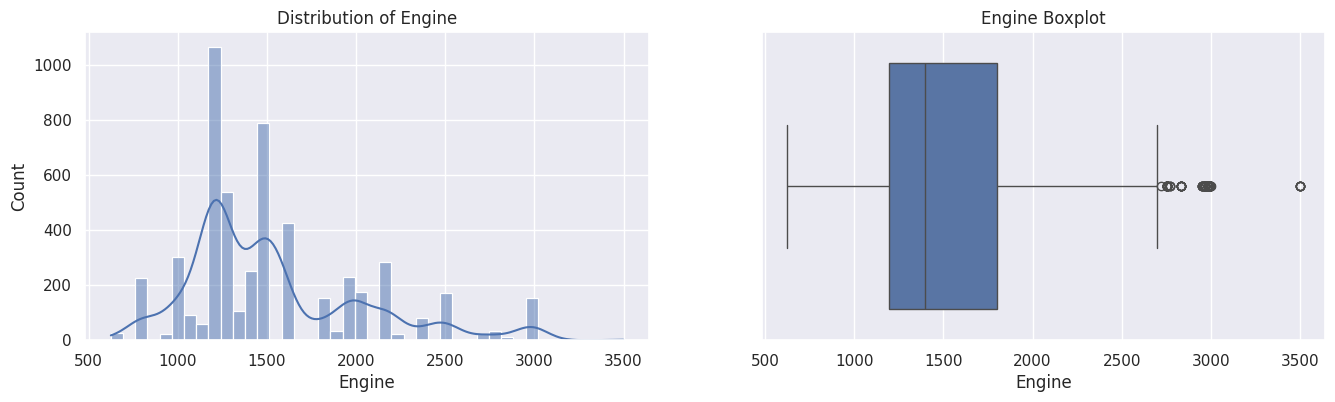

In [ ]:
plot_num(df,'Engine')

<h3>8. Power

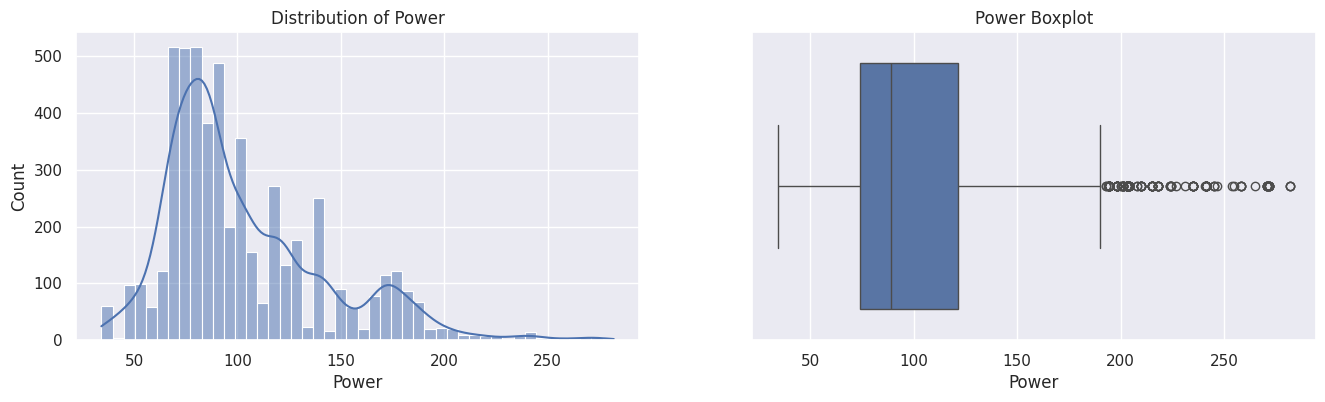

In [ ]:
plot_num(df,'Power')

<h3>9. Seats

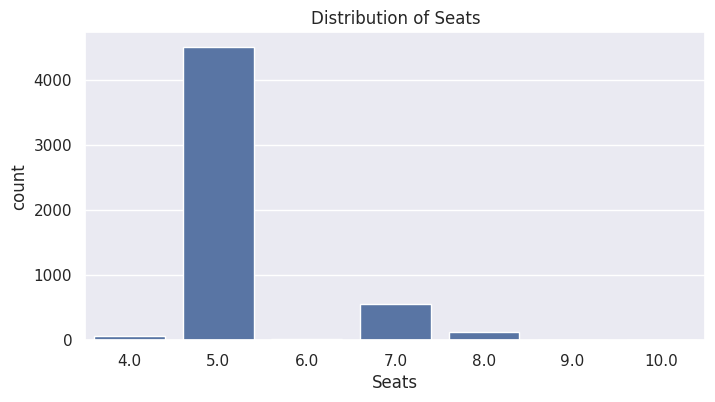

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Seats');
plt.title('Distribution of Seats');

In [ ]:
df['Seats'].value_counts()

Seats
5.0     4509
7.0      558
8.0      121
4.0       62
6.0       26
10.0       4
9.0        3
Name: count, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, it may be advisable to exclude Seats with low frequency from the dataset.
    </p>
</div>

In [ ]:
df = df[df.Seats.between(5,8)]

<h3>10. Company

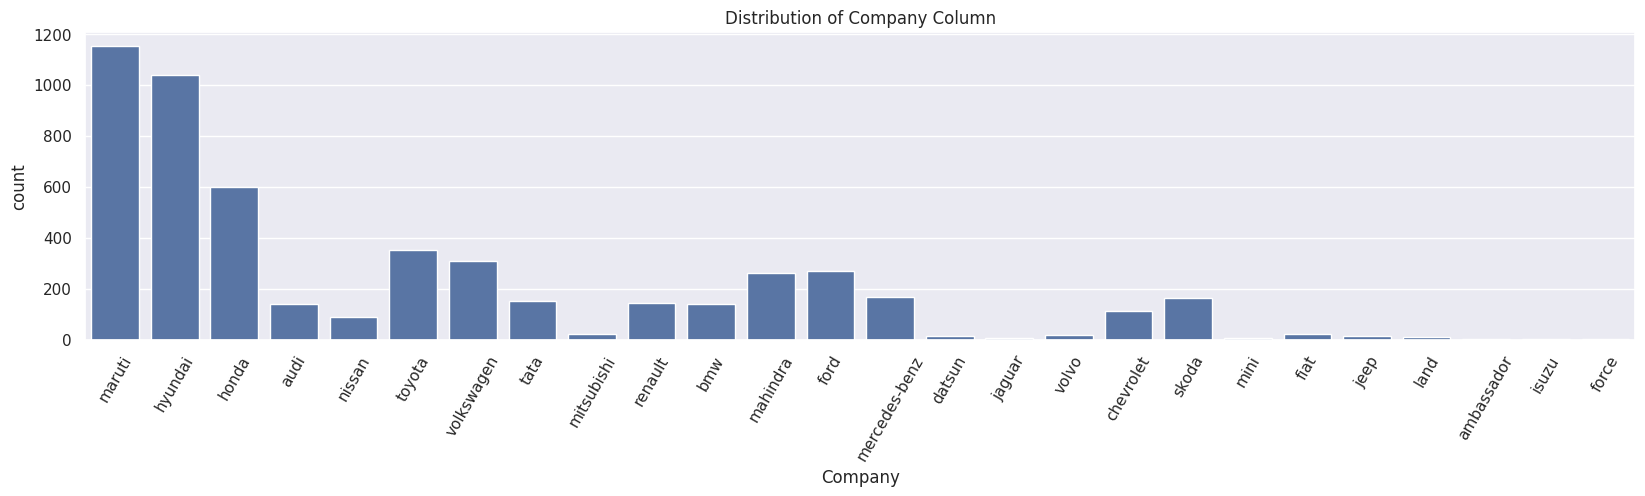

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

<h3>11. Model

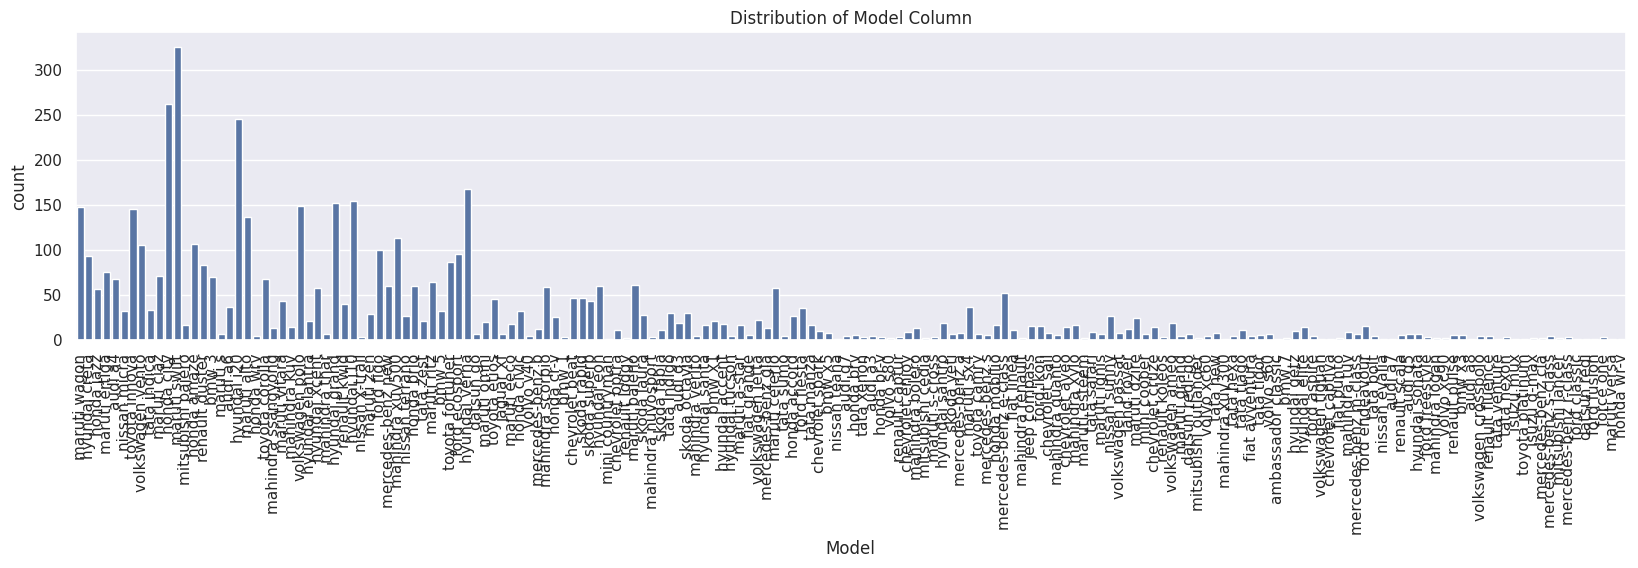

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [ ]:
df.Model.value_counts()

Model
maruti swift         326
honda city           262
hyundai i20          246
hyundai verna        168
hyundai i10          154
                    ... 
volkswagen tiguan      1
audi a8                1
chevrolet captiva      1
nissan evalia          1
honda wr-v             1
Name: count, Length: 176, dtype: int64

In [ ]:
threshold = 10
counts = df.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
df = df[~df['Model'].isin(to_drop)]

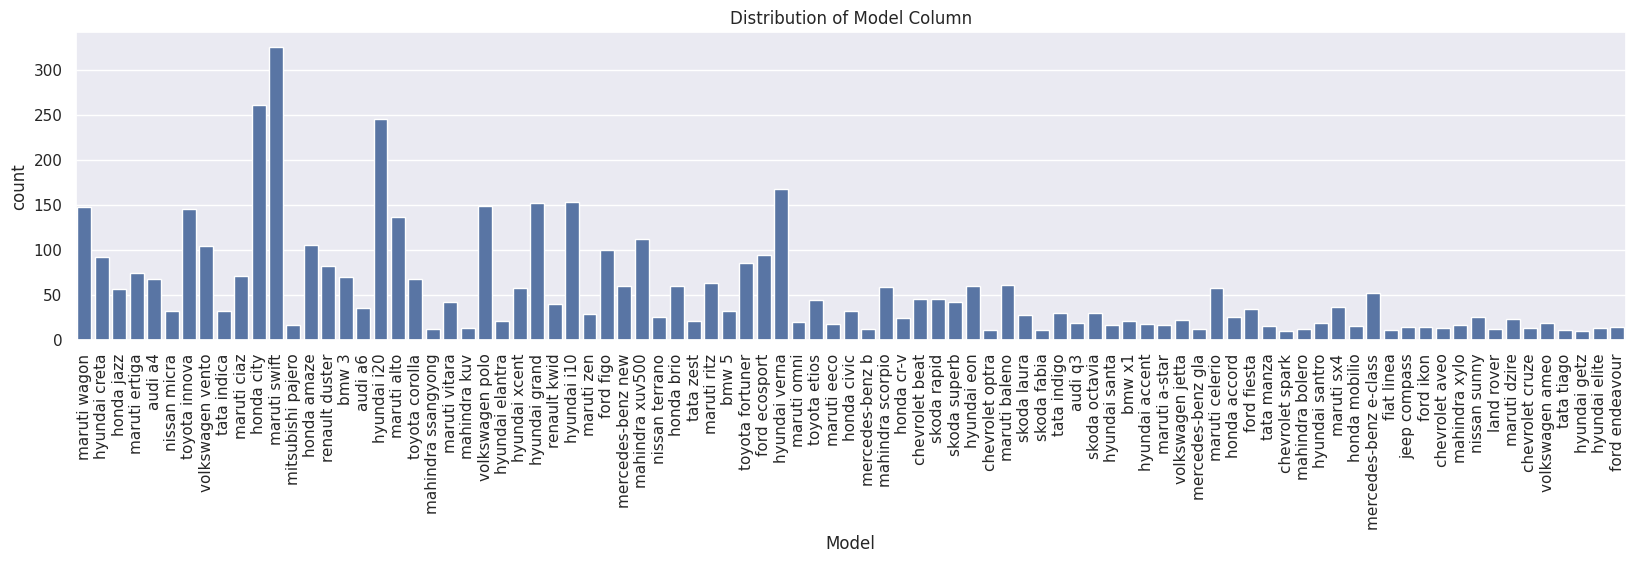

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

<h3>12. Location

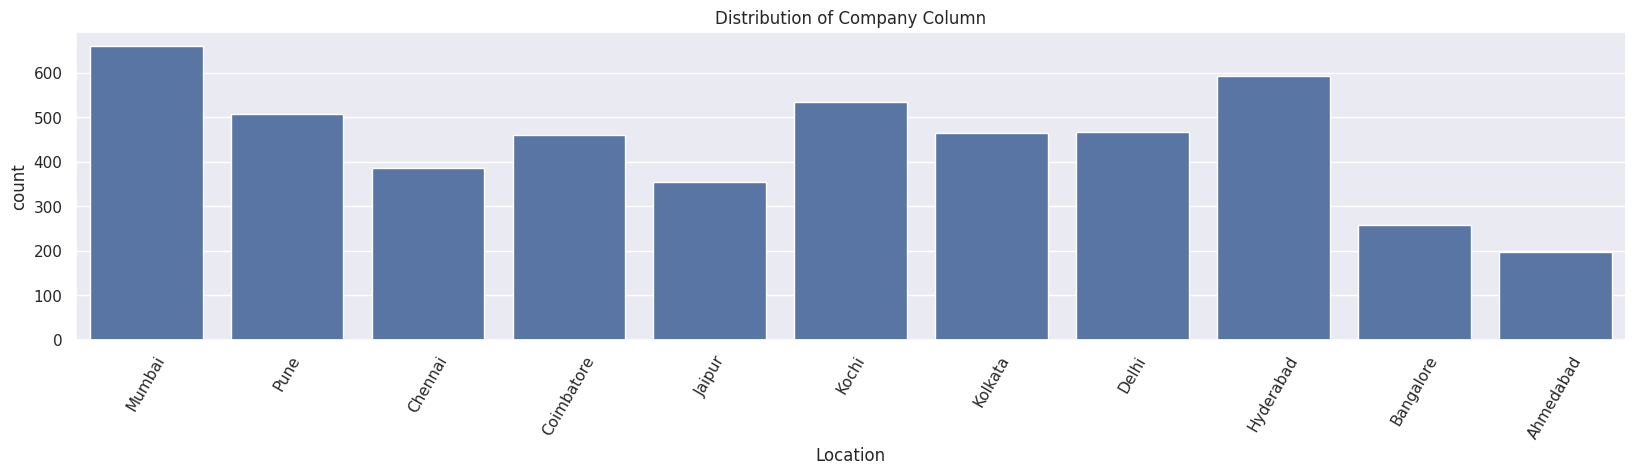

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

<h3>13. Price

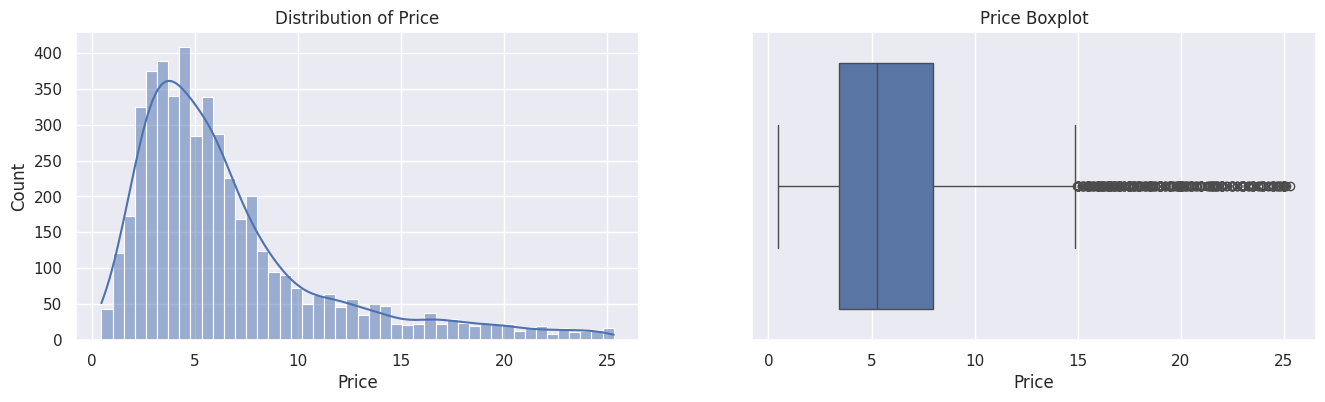

In [ ]:
plot_num(df,'Price')

# Bivariate Analysis

In [ ]:
agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Year vs Mean Price')
fig.show()

In [ ]:
fig = px.scatter(df,x='Kilometers_Driven',y='Price' , width=700 , height =500,title='Kilometers Driven vs Mean Price')
fig.show()

In [ ]:
agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
fig.show()

In [ ]:
agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Transmission Type vs Mean Price')
fig.show()

In [ ]:
agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
fig.show()

In [ ]:
fig = px.scatter(df,x='Mileage',y='Price' , width=700 , height =500,title='Mileage vs Mean Price')
fig.show()

In [ ]:
fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
fig.show()

In [ ]:
fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
fig.show()

In [ ]:
agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
fig.show()

In [ ]:
agg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Company vs Mean Price')
fig.show()

In [ ]:
agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
fig.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.corr(),annot=True,cmap='Blues');

AttributeError: module 'pandas' has no attribute 'corr'

<Figure size 1000x600 with 0 Axes>

AttributeError: module 'pandas' has no attribute 'corr'

<Figure size 1000x600 with 0 Axes>

# Building Model

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge ,Lasso
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from category_encoders import BinaryEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
def tune_and_evaluate(model, param_grid):

    # Hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_
    print("Best Parameters: ", grid_search.best_params_)
    print("Mean of cross validation scores: ", grid_search.best_score_)
    print('--------------------------------------')

    # Measuring accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mse)

    print("Training set R^2: ", round(train_score, 4) * 100)
    print("Testing set R^2: ", round(test_score, 4) * 100)
    print("MSE: ", mse)
    print("RMSE: ", rmse)

    return model

# Data Splitting and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4880 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4880 non-null   object 
 1   Year               4880 non-null   int64  
 2   Kilometers_Driven  4880 non-null   int64  
 3   Fuel_Type          4880 non-null   object 
 4   Transmission       4880 non-null   object 
 5   Owner_Type         4880 non-null   int64  
 6   Mileage            4880 non-null   float64
 7   Engine             4880 non-null   float64
 8   Power              4880 non-null   float64
 9   Seats              4880 non-null   float64
 10  Price              4880 non-null   float64
 11  Company            4880 non-null   object 
 12  Model              4880 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 533.8+ KB


In [ ]:
X = df.drop(['Price', 'Location', 'Owner_Type','Company', 'Model'],axis=1)
y = df['Price']

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3904 entries, 3413 to 1102
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3904 non-null   int64  
 1   Kilometers_Driven  3904 non-null   int64  
 2   Fuel_Type          3904 non-null   object 
 3   Transmission       3904 non-null   object 
 4   Mileage            3904 non-null   float64
 5   Engine             3904 non-null   float64
 6   Power              3904 non-null   float64
 7   Seats              3904 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 274.5+ KB


In [ ]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=2)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()

)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

# 1. LinearRegression

In [ ]:
#Model Building
lin_reg = make_pipeline(
    preprocessor,
    LinearRegression()
)
#hyperparameter tunning
param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4]}
lin_reg = tune_and_evaluate(lin_reg, param_grid)

Best Parameters:  {'columntransformer__pipeline-1__polynomialfeatures__degree': 3}
Mean of cross validation scores:  0.8446270303870234
--------------------------------------
Training set R^2:  85.89
Testing set R^2:  81.6
MSE:  4.215251976661857
RMSE:  2.05310788237293


# 2. Ridge

In [ ]:
#Model Building
ridge = make_pipeline(
    preprocessor,
    Ridge()
)
#hyperparameter tunning
param_grid = {
    'ridge__alpha':[1e-8,1e-9,1e-10],
    'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4]
}
ridge = tune_and_evaluate(ridge, param_grid)

Best Parameters:  {'columntransformer__pipeline-1__polynomialfeatures__degree': 3, 'ridge__alpha': 1e-08}
Mean of cross validation scores:  0.8445969085054387
--------------------------------------
Training set R^2:  85.89
Testing set R^2:  81.6
MSE:  4.215251976687057
RMSE:  2.053107882379067


# 3. Lasso

In [ ]:
#Model Building
lasso = make_pipeline(
    preprocessor,
    Lasso()
)

#Hyperparameter Tunning
param_grid={
    "lasso__alpha":[1e-6,1e-7,1e-8],
    "columntransformer__pipeline-1__polynomialfeatures__degree":[2,3,4]
}
lasso = tune_and_evaluate(lasso, param_grid)

Best Parameters:  {'columntransformer__pipeline-1__polynomialfeatures__degree': 3, 'lasso__alpha': 1e-06}
Mean of cross validation scores:  0.8451854112056442
--------------------------------------
Training set R^2:  85.86
Testing set R^2:  81.73
MSE:  4.184641022199479
RMSE:  2.045639514234969


# 4. XGBooster

In [ ]:
from xgboost import XGBRegressor
from sklearn.compose import make_column_transformer

# Full pipeline for numerical and categorical features
preprocessor = make_column_transformer(
    (num_pipeline, num_features),
    (cat_pipeline, cat_features)
)

# Model Building: XGBoost Regression
xgb_reg = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=42)
)

# Hyperparameter tuning
param_grid = {
    'xgbregressor__n_estimators': [100, 200, 300],      # Number of boosting rounds
    'xgbregressor__max_depth': [3, 5, 7],               # Maximum depth of a tree
    'xgbregressor__learning_rate': [0.01, 0.1, 0.3],    # Step size shrinkage used in update
    'xgbregressor__subsample': [0.8, 0.9, 1.0],         # Subsample ratio of the training instances
    'xgbregressor__colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

xgb_reg = tune_and_evaluate(xgb_reg, param_grid)


Best Parameters:  {'xgbregressor__colsample_bytree': 0.8, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 0.8}
Mean of cross validation scores:  0.9142255391238916
--------------------------------------
Training set R^2:  97.78999999999999
Testing set R^2:  89.9
MSE:  2.312895531625402
RMSE:  1.5208206770113963


In [ ]:
pip install

In [ ]:
import joblib

# Save the model to a file
joblib.dump(xgb_reg, 'xgboost_regression_model.pkl')

['xgboost_regression_model.pkl']